In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Install Kaggle API if not installed
!pip install -q kaggle

# Upload Kaggle API key
from google.colab import files
files.upload()  # Upload kaggle.json (download it from https://www.kaggle.com/account)

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Download the dataset
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

# Unzip the dataset
!unzip -q brain-tumor-classification-mri.zip -d brain_tumor_data

# List extracted files
import os
for dirname, _, filenames in os.walk("brain_tumor_data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
brain_tumor_data/Testing/meningioma_tumor/image(81).jpg
brain_tumor_data/Testing/meningioma_tumor/image(35).jpg
brain_tumor_data/Testing/meningioma_tumor/image(78).jpg
brain_tumor_data/Testing/meningioma_tumor/image(71).jpg
brain_tumor_data/Testing/meningioma_tumor/image(126).jpg
brain_tumor_data/Testing/meningioma_tumor/image(57).jpg
brain_tumor_data/Testing/meningioma_tumor/image(34).jpg
brain_tumor_data/Testing/meningioma_tumor/image(66).jpg
brain_tumor_data/Testing/meningioma_tumor/image(93).jpg
brain_tumor_data/Testing/meningioma_tumor/image(90).jpg
brain_tumor_data/Testing/meningioma_tumor/image(5).jpg
brain_tumor_data/Testing/meningioma_tumor/image(25).jpg
brain_tumor_data/Testing/meningioma_tumor/image(100).jpg
brain_tumor_data/Testing/meningioma_tumor/image(47).jpg
brain_tumor_data/Testing/meningioma_tumor/image(109).jpg
brain_tumor_data/T

In [2]:
!pip install opencv-python
import cv2
import numpy as np
import os
from tqdm import tqdm

# Set image size (you can change this based on your model input size)
IMG_SIZE = 128

# Paths
data_dir = "brain_tumor_data/Training"  # or adjust based on your extracted folder
categories = os.listdir(data_dir)

# Data lists
image_data = []
labels = []

# Loop through each category (e.g., 'yes', 'no')
for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    for img_name in tqdm(os.listdir(category_path), desc=f"Processing {category}"):
        img_path = os.path.join(category_path, img_name)

        # Read the image
        img = cv2.imread(img_path)

        # Preprocessing
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale (optional)
        img = img / 255.0  # Normalize to [0,1]

        # Flatten the image to a 1D vector
        img_vector = img.flatten()

        # Append to data lists
        image_data.append(img_vector)
        labels.append(label)

# Convert to NumPy arrays
X = np.array(image_data)
y = np.array(labels)

print("Shape of feature matrix:", X.shape)
print("Shape of labels:", y.shape)

Processing no_tumor: 100%|██████████| 395/395 [00:00<00:00, 453.45it/s]


Shape of feature matrix: (2870, 16384)
Shape of labels: (2870,)


In [3]:
!pip install -q kaggle
!pip install -q gradio
!pip install -q opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [4]:
!pip install tensorflow
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
X = []
y = []

# Load and preprocess Training + Testing data
for label in labels:
    for folder in ['Training', 'Testing']:
        folder_path = os.path.join('brain_tumor_data', folder, label)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0  # Normalize
                X.append(img)
                y.append(labels.index(label))

X = np.array(X)
y = np.array(y)
X, y = shuffle(X, y, random_state=42)
y = tf.keras.utils.to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")

Training samples: (2611, 150, 150, 3), Test samples: (653, 150, 150, 3)


In [5]:
import tensorflow as tf

try:
    # Try to detect and initialize TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    # Fallback to default strategy if no TPU is found
    strategy = tf.distribute.get_strategy()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)


In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 224ms/step - accuracy: 0.3471 - loss: 1.5032 - val_accuracy: 0.4655 - val_loss: 1.1917
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - accuracy: 0.4955 - loss: 1.1721 - val_accuracy: 0.5789 - val_loss: 0.9801
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.5414 - loss: 1.0456 - val_accuracy: 0.6233 - val_loss: 0.8711
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.5771 - loss: 0.9436 - val_accuracy: 0.6340 - val_loss: 0.8758
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.6139 - loss: 0.9167 - val_accuracy: 0.6417 - val_loss: 0.8241
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.6387 - loss: 0.8465 - val_accuracy: 0.6646 - val_loss: 0.7486
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.6340 - loss: 0.8522 - val_accuracy: 0.6034 - val_loss: 0.8677
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.6403 - loss: 0.8534 - val_accu

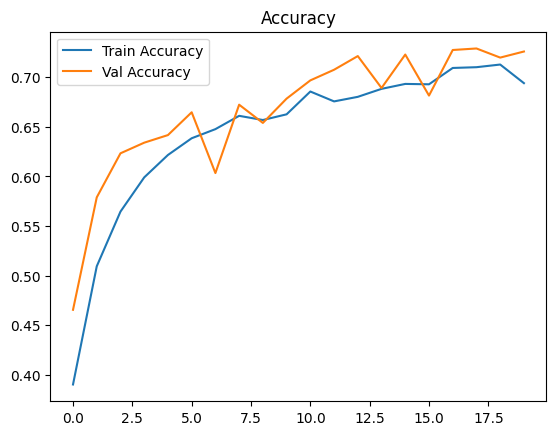

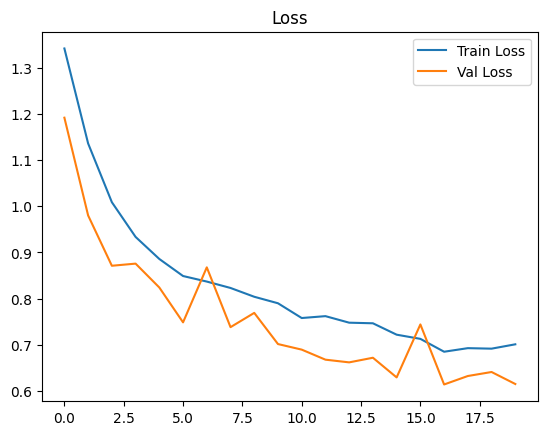

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend(); plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss")
plt.show()


In [10]:
# 📦 Install libraries (if not already installed in Colab)
!pip install -q gradio scikit-learn matplotlib seaborn

import gradio as gr
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Assume model, X_test, y_test, labels are already loaded

# 🔍 Prediction function
def predict_tumor(img):
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0]
    class_idx = np.argmax(prediction)
    confidence = float(np.max(prediction)) * 100
    return f"{labels[class_idx]} ({confidence:.2f}%)"

# 📊 Classification Report and Confusion Matrix Generator
def evaluation_results():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=labels)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    plt.close()

    return report, cm_path

# 🧠 Project Description Page
description_text = """
## 🧠 Brain Tumor Detection Project

This project uses a Convolutional Neural Network (CNN) to detect different types of brain tumors from MRI images.

**Tumor Types Covered:**
- Glioma
- Meningioma
- Pituitary
- No Tumor

Upload an MRI image to predict the tumor type.
You can also view the classification report and confusion matrix based on the test set.
"""

# 📌 Gradio Tab 1 - Upload and Predict
predict_tab = gr.Interface(
    fn=predict_tumor,
    inputs=gr.Image(type="numpy", label="Upload Brain MRI"),
    outputs=gr.Textbox(label="Prediction"),
    title="Brain Tumor Classifier",
    description="Upload a brain MRI image to predict the tumor type."
)

# 📌 Gradio Tab 2 - Evaluation Report
report_tab = gr.Interface(
    fn=evaluation_results,
    inputs=None,
    outputs=[
        gr.Textbox(label="Classification Report"),
        gr.Image(label="Confusion Matrix")
    ],
    title="Model Evaluation",
    description="Precision, Recall, F1-Score and Confusion Matrix based on test dataset."
)

# 📌 Gradio Tab 3 - Project Description
intro_tab = gr.Interface(
    fn=lambda: description_text,
    inputs=[],
    outputs=gr.Markdown(),
    title="Project Overview",
    description="Introduction to the Brain Tumor Detection Project"
)

# 🔗 Combine into a Gradio Tabbed Interface
gr.TabbedInterface(
    interface_list=[intro_tab, predict_tab, report_tab],
    tab_names=["📖 Description", "🧪 Predict", "📊 Evaluate"]
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e5226fbca0f757d67.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
